In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import imageio
img = imageio.imread('homero.jpg')
img.shape

(648, 1152, 3)

In [ ]:
componentes =648*1152*3
print(componentes) 

2239488


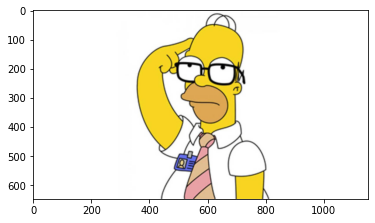

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
def reconstruct(img, k):
    reconstructed = np.zeros(img.shape)
    for i in range(img.shape[2]):
        U, Sigma, V_transpose = np.linalg.svd(img[:, :, i])
        reconstructed[:, :, i] = U[:, :k] @ np.diag(Sigma[:k]) @ V_transpose[:k, :]
    return reconstructed

In [ ]:
reconstructed = reconstruct(img, k=1)

In [ ]:
def rescale_img(img):
    rescaled = (img - img.min()) / (img.max() - img.min())
    return rescaled

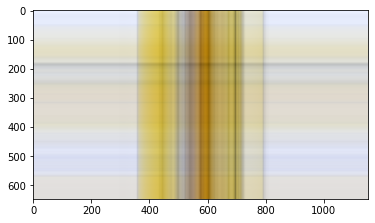

In [ ]:
plt.imshow(rescale_img(reconstructed))
plt.show()

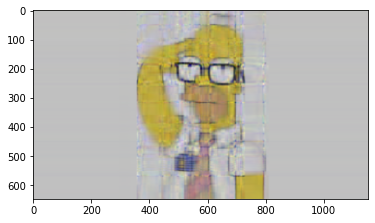

In [ ]:
reconstructed = reconstruct(img, k=10)
plt.imshow(rescale_img(reconstructed))
plt.show()

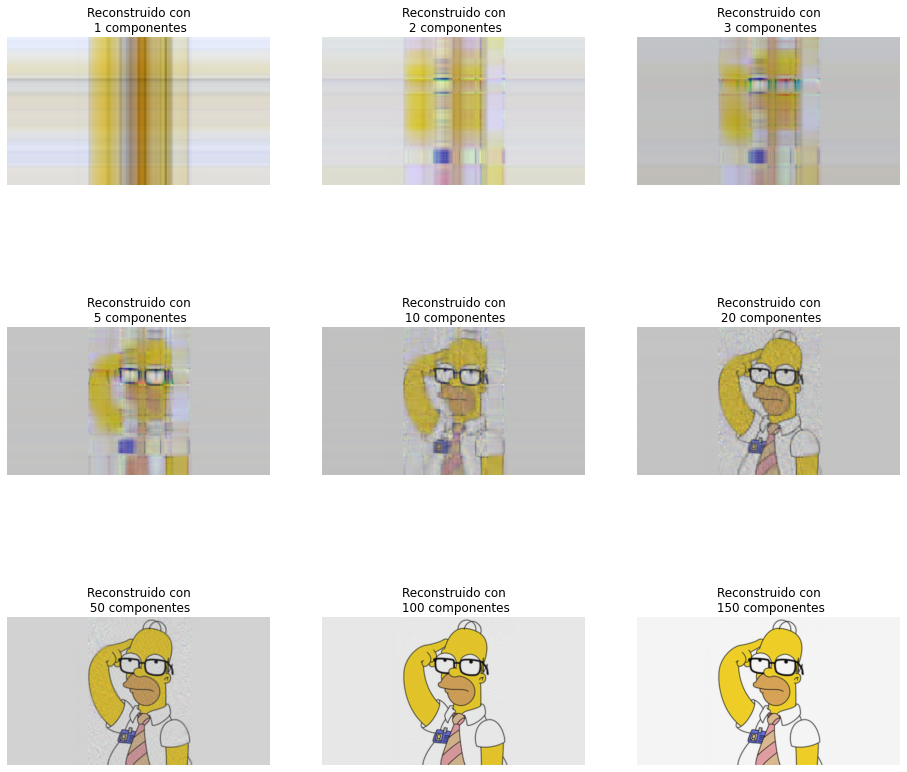

In [ ]:
f, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 16))
f.subplots_adjust(hspace=0)

n_components = [1, 2, 3, 5, 10, 20, 50, 100,150]

count = 0
for ax, n_component in zip(axes.flatten(), n_components):
    reconstructed = reconstruct(img, k=n_component)
    ax.axis('off')
    ax.imshow(rescale_img(reconstructed))
    ax.set_title(f"Reconstruido con\n {n_component} componentes")
    
    count += 1

plt.show()